<font size="7">DATA CLEANING, VISUALIZATION & EXPLORATORY DATA ANALYSIS</font>

In [ ]:
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import joblib

from PIL import Image

In [ ]:
df_train = pd.read_csv("train(1)(train(1)).csv")
df_test = pd.read_csv("test2(test(1)).csv")

df_train.columns = [c.lower().strip() for c in df_train.columns]
df_test.columns = [c.lower().strip() for c in df_test.columns]

print("Train shape:", df_train.shape, "Test shape:", df_test.shape if df_test is not None else None)


Train shape: (16209, 21) Test shape: (5404, 20)


In [ ]:
display(df_train.head(5))
print("\n--- dtypes ---")
print(df_train.dtypes)
print("\n--- numeric describe ---")
display(df_train.describe().T)

for c in df_train.columns:
    print(f"{c:25s} unique: {df_train[c]}  sample values: {df_train[c].dropna()}")

id             date   price  bedrooms  bathrooms  sqft_living  \
0  1000102  20140916T000000  280000         6       3.00         2400   
1  1200019  20140508T000000  647500         4       1.75         2060   
2  1200021  20140811T000000  400000         3       1.00         1460   
3  2800031  20150401T000000  235000         3       1.00         1430   
4  3600057  20150319T000000  402500         4       2.00         1650   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9373     2.0           0     0  ...      7        2400              0   
1     26036     1.0           0     0  ...      8        1160            900   
2     43000     1.0           0     0  ...      7        1460              0   
3      7599     1.5           0     0  ...      6        1010            420   
4      3504     1.0           0     0  ...      7         760            890   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1991             0    98002  47.3262 -122.214           2060   
1      1947             0    98166  47.4444 -122.351           2590   
2      1952             0    98166  47.4434 -122.347           2250   
3      1930             0    98168  47.4783 -122.265           1290   
4      1951          2013    98144  47.5803 -122.294           1480   

   sqft_lot15  
0        7316  
1       21891  
2       20023  
3       10320  
4        3504  

[5 rows x 21 columns]


--- dtypes ---
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

--- numeric describe ---


count          mean           std           min  \
id             16209.0  4.575771e+09  2.874661e+09  1.000102e+06   
price          16209.0  5.374703e+05  3.603036e+05  7.500000e+04   
bedrooms       16209.0  3.367820e+00  9.332701e-01  0.000000e+00   
bathrooms      16209.0  2.113054e+00  7.652419e-01  0.000000e+00   
sqft_living    16209.0  2.073275e+03  9.070095e+02  2.900000e+02   
sqft_lot       16209.0  1.486767e+04  3.882570e+04  5.200000e+02   
floors         16209.0  1.498828e+00  5.430321e-01  1.000000e+00   
waterfront     16209.0  6.971436e-03  8.320614e-02  0.000000e+00   
view           16209.0  2.342526e-01  7.631515e-01  0.000000e+00   
condition      16209.0  3.407860e+00  6.515529e-01  1.000000e+00   
grade          16209.0  7.652971e+00  1.171050e+00  1.000000e+00   
sqft_above     16209.0  1.784754e+03  8.218208e+02  2.900000e+02   
sqft_basement  16209.0  2.885202e+02  4.385989e+02  0.000000e+00   
yr_built       16209.0  1.971153e+03  2.937270e+01  1.900000e+03   
yr_renovated   16209.0  8.273811e+01  3.978611e+02  0.000000e+00   
zipcode        16209.0  9.807797e+04  5.335528e+01  9.800100e+04   
lat            16209.0  4.756071e+01  1.383396e-01  4.715930e+01   
long           16209.0 -1.222140e+02  1.400934e-01 -1.225190e+02   
sqft_living15  16209.0  1.983152e+03  6.819052e+02  3.990000e+02   
sqft_lot15     16209.0  1.273557e+04  2.693316e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904950e+09  7.304301e+09  9.900000e+09  
price          3.200000e+05  4.500000e+05  6.400000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.500000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.205000e+04  
sqft_lot       5.004000e+03  7.599000e+03  1.063100e+04  1.164794e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.200000e+03  1.560000e+03  2.200000e+03  8.860000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.952000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811700e+04  9.819900e+04  
lat            4.747250e+01  4.757240e+01  4.767820e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.480000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.098000e+03  7.620000e+03  1.005300e+04  8.712000e+05

id                        unique: 0           1000102
1           1200019
2           1200021
3           2800031
4           3600057
            ...    
16204    9839301165
16205    9842300485
16206    9842300540
16207    9895000040
16208    9900000190
Name: id, Length: 16209, dtype: int64  sample values: 0           1000102
1           1200019
2           1200021
3           2800031
4           3600057
            ...    
16204    9839301165
16205    9842300485
16206    9842300540
16207    9895000040
16208    9900000190
Name: id, Length: 16209, dtype: int64
date                      unique: 0        20140916T000000
1        20140508T000000
2        20140811T000000
3        20150401T000000
4        20150319T000000
              ...       
16204    20141001T000000
16205    20150311T000000
16206    20140624T000000
16207    20140703T000000
16208    20141030T000000
Name: date, Length: 16209, dtype: object  sample values: 0        20140916T000000
1        20140508T000000
2        20140811T

In [ ]:
missing = df_train.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
if missing.shape[0] == 0:
    print("No missing values in train.")
else:
    display(missing.to_frame("missing_frac").style.bar(subset=["missing_frac"], color=['#d65f5f']))
    plt.figure(figsize=(8,4))
    sns.barplot(x=missing.values, y=missing.index, palette="vlag")
    plt.xlabel("Fraction missing")
    plt.title("Columns with missing values (train)")
    plt.show()

No missing values in train.


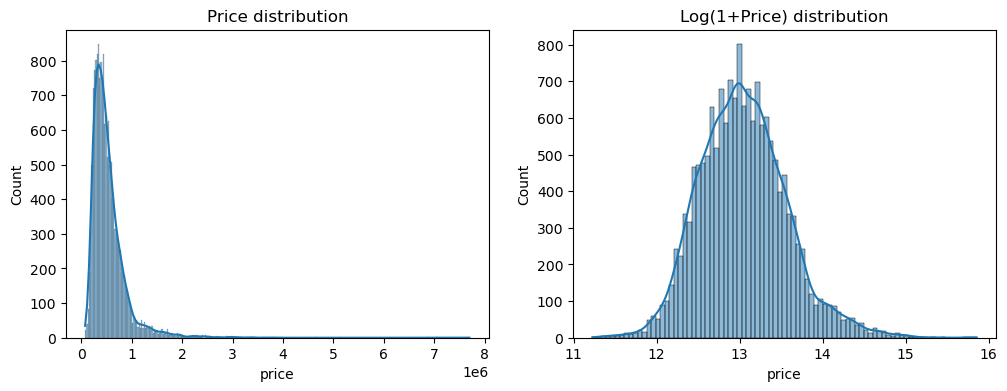

Price mean 537470.28, median 450000.00, skew 4.033, kurtosis 37.106


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_train['price'].dropna(), kde=True)
plt.title("Price distribution")
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_train['price'].dropna()), kde=True)
plt.title("Log(1+Price) distribution")
plt.show()

price = df_train['price'].dropna()
print("Price mean {:.2f}, median {:.2f}, skew {:.3f}, kurtosis {:.3f}".format(price.mean(), price.median(), price.skew(), price.kurtosis()))

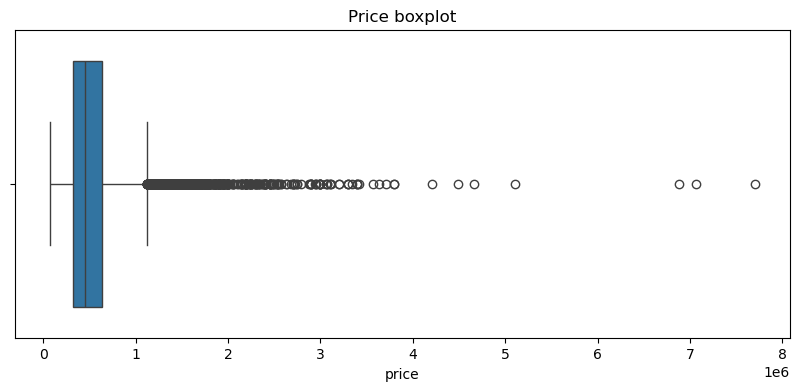

Price percentiles:
 0.01     154536.0
0.05     210000.0
0.25     320000.0
0.50     450000.0
0.75     640000.0
0.95    1150000.0
0.99    1944600.0
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train['price'])
plt.title("Price boxplot")
plt.show()

pct = df_train['price'].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99])
print("Price percentiles:\n", pct)

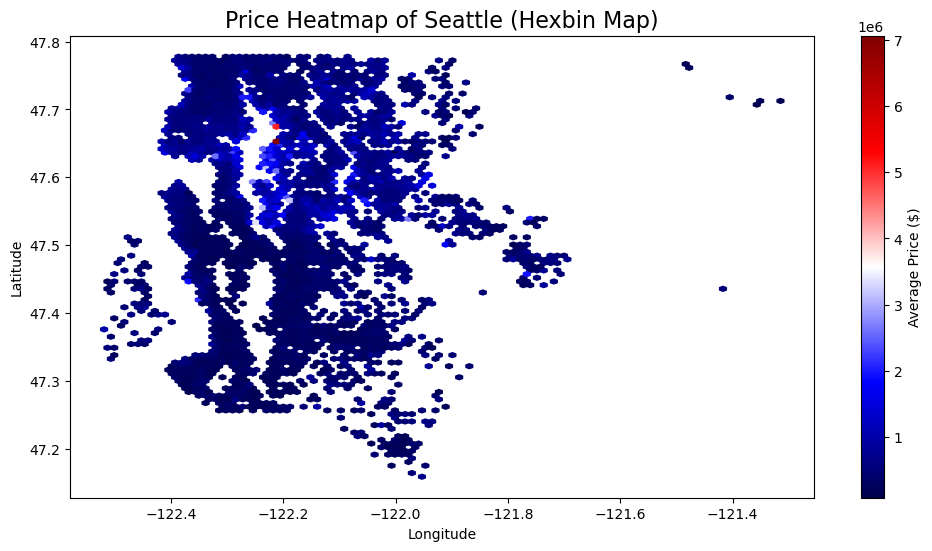

In [7]:
plt.figure(figsize=(12, 6))
plt.hexbin(df_train['long'], df_train['lat'], C=df_train['price'], gridsize=100, cmap='seismic', mincnt=1)
cb = plt.colorbar(label='Average Price ($)')
plt.title("Price Heatmap of Seattle (Hexbin Map)", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Numeric columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


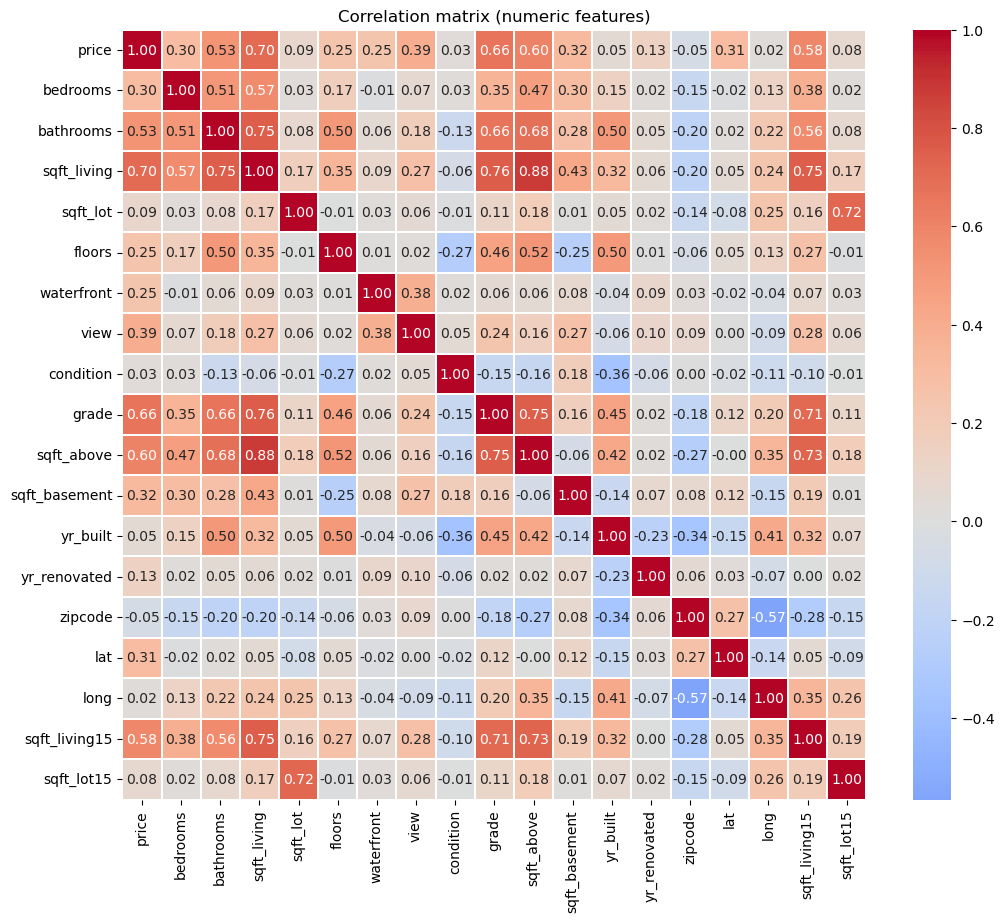

abs_corr_with_price
price                     1.000000
sqft_living               0.700933
grade                     0.664266
sqft_above                0.602648
sqft_living15             0.581781
bathrooms                 0.525487
view                      0.390534
sqft_basement             0.320301
lat                       0.310008
bedrooms                  0.304454
floors                    0.251428
waterfront                0.245221
yr_renovated              0.133075
sqft_lot                  0.088526
sqft_lot15                0.076060

In [ ]:
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

num_cols = [c for c in num_cols if c not in ('id',)]
print("Numeric columns:", num_cols)

corr = df_train[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=.3)
plt.title("Correlation matrix (numeric features)")
plt.show()

if 'price' in corr.columns:
    top_corr = corr['price'].abs().sort_values(ascending=False)
    display(top_corr.head(15).to_frame("abs_corr_with_price"))

Candidate categorical columns (numeric-coded): ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'view', 'waterfront']


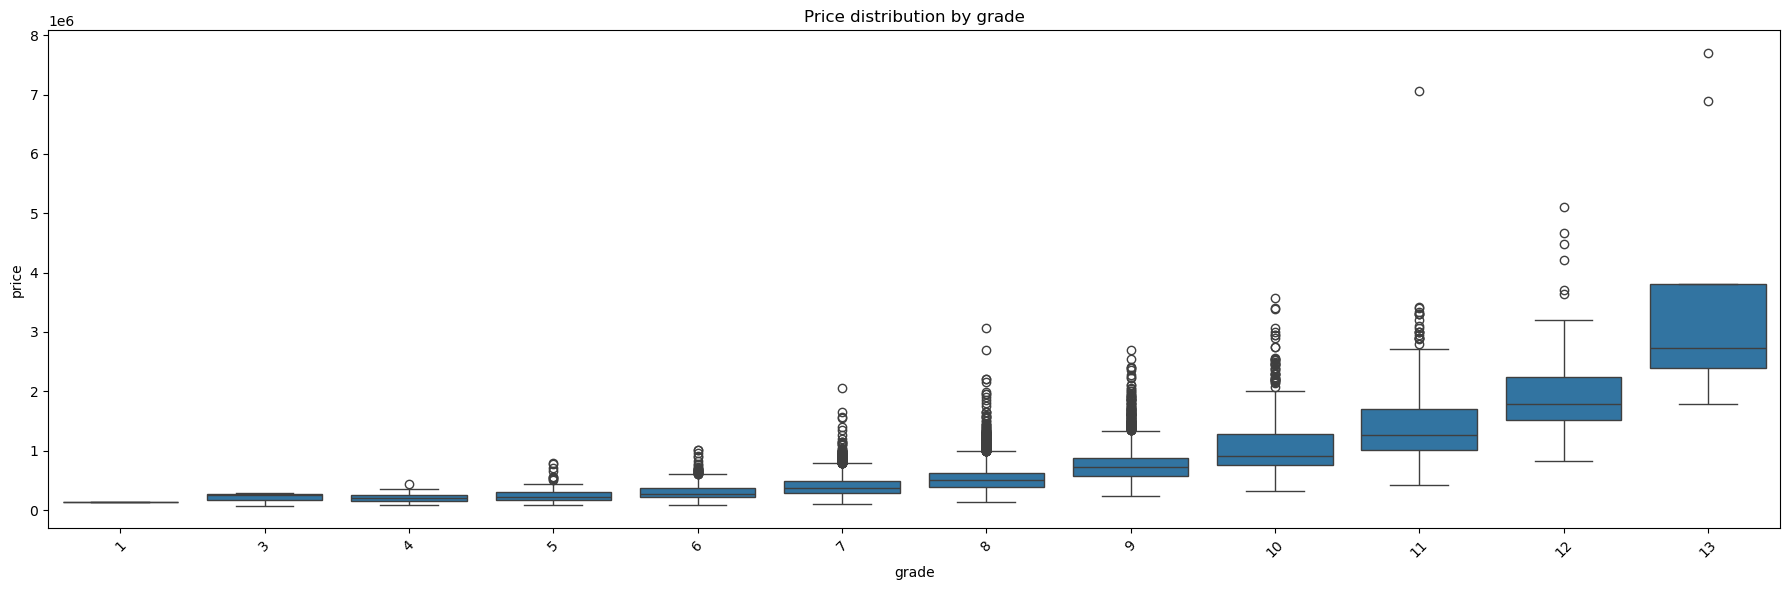

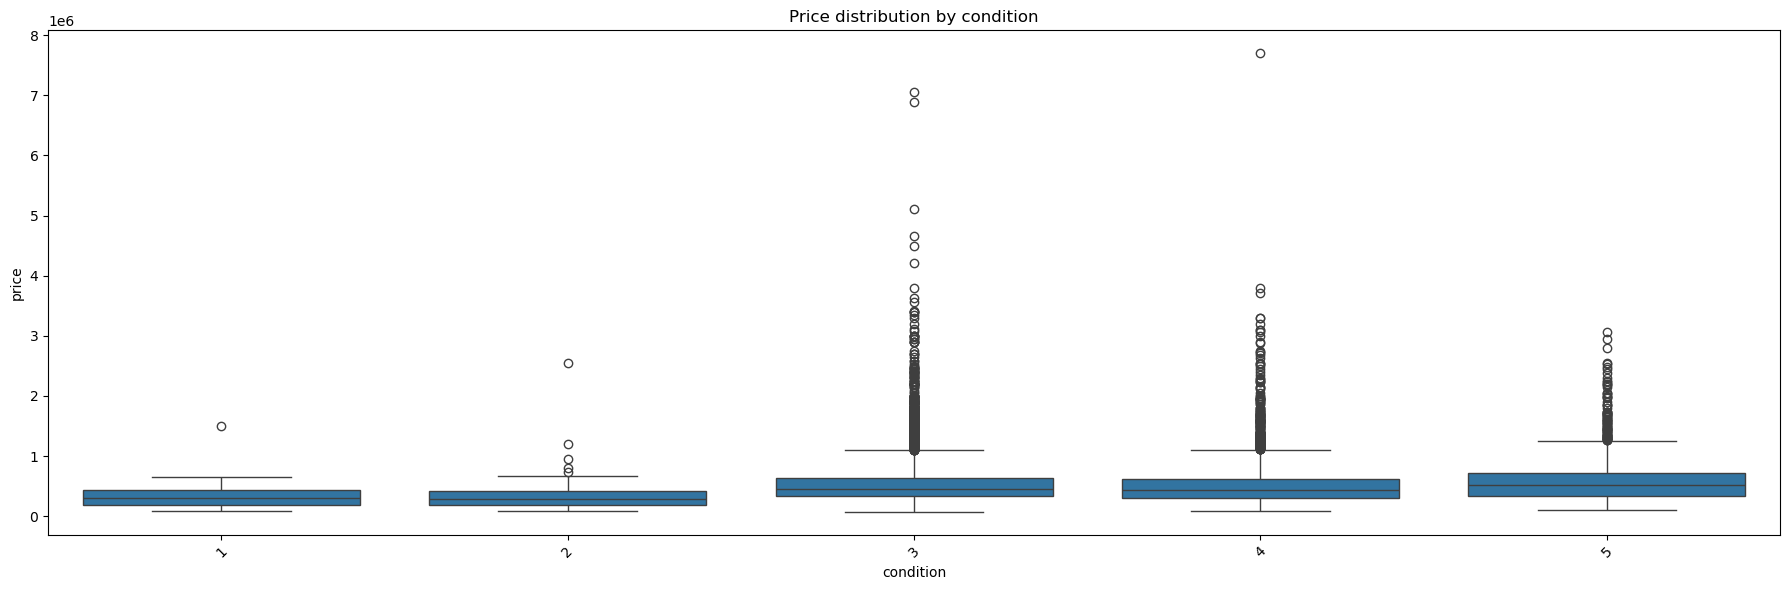

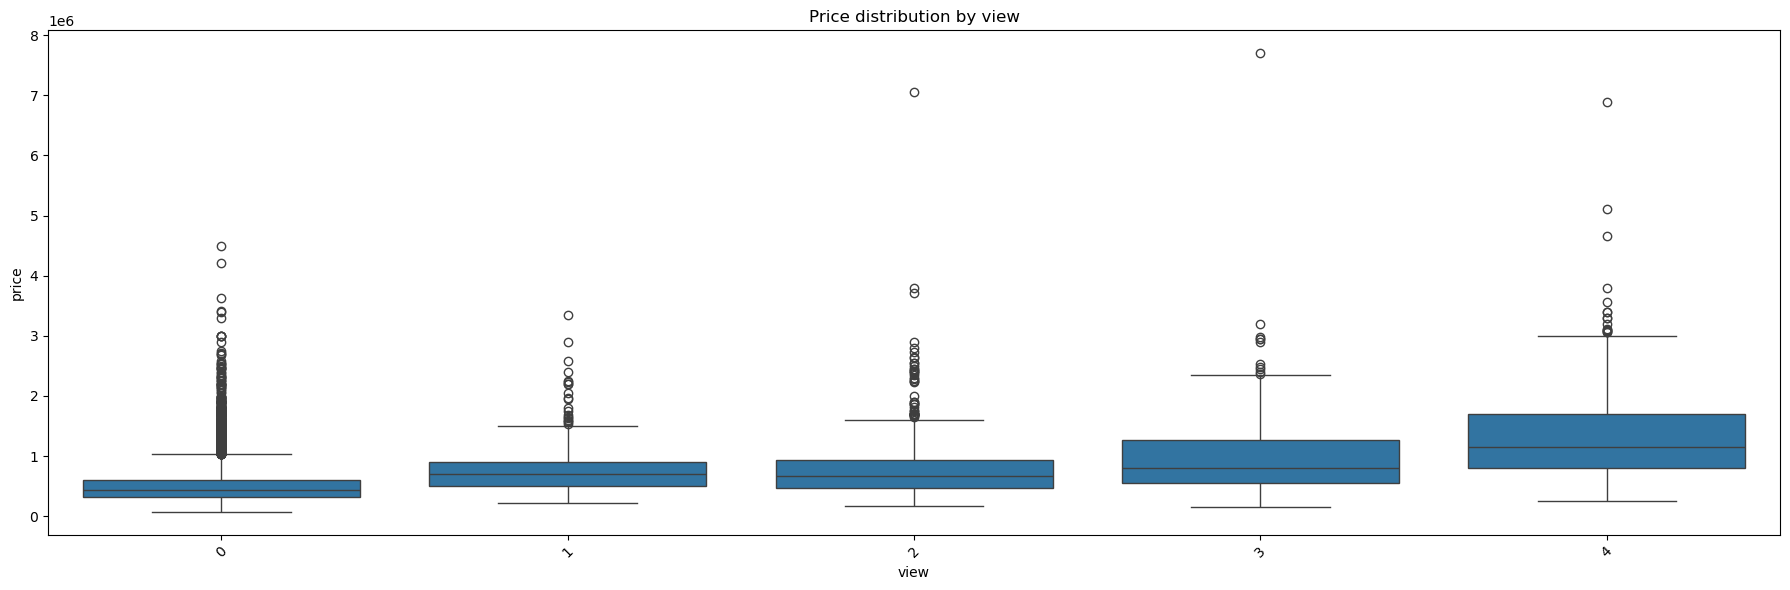

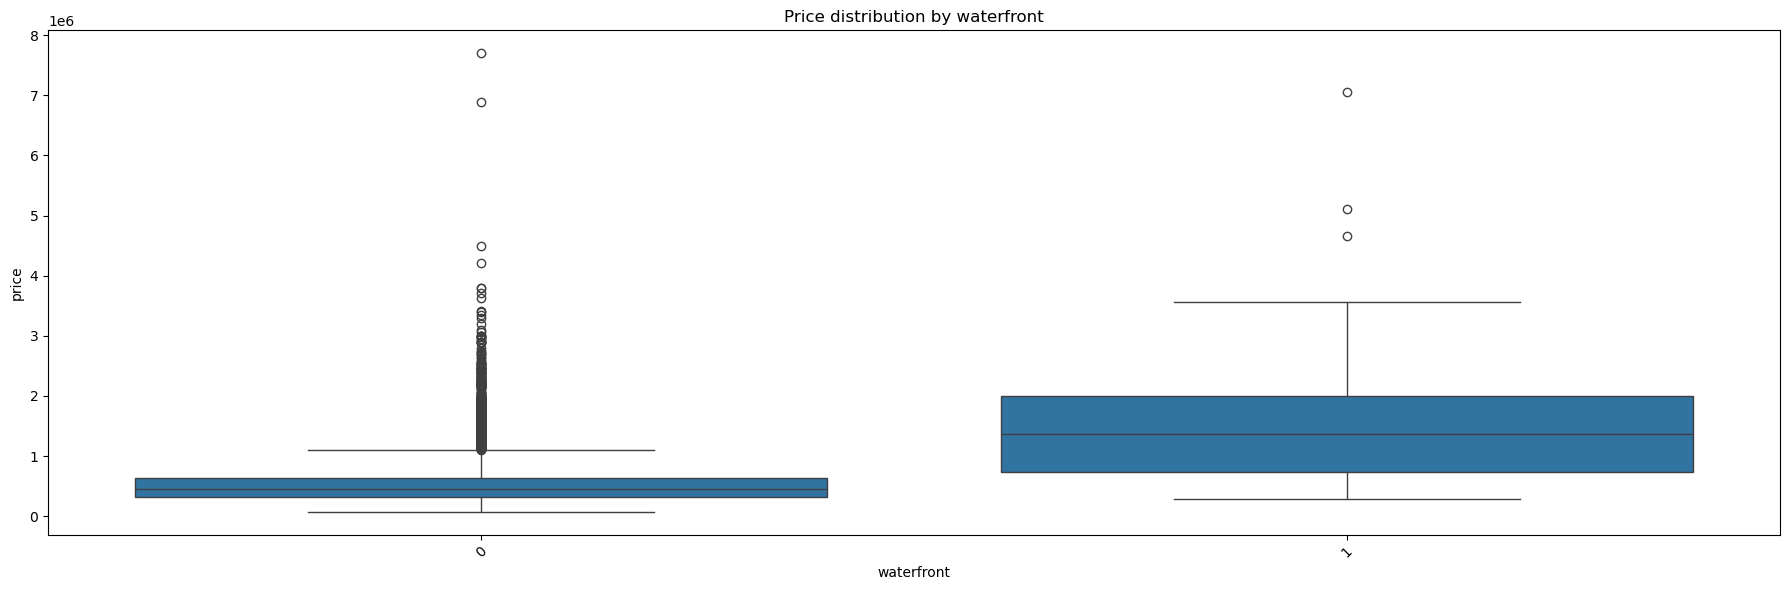

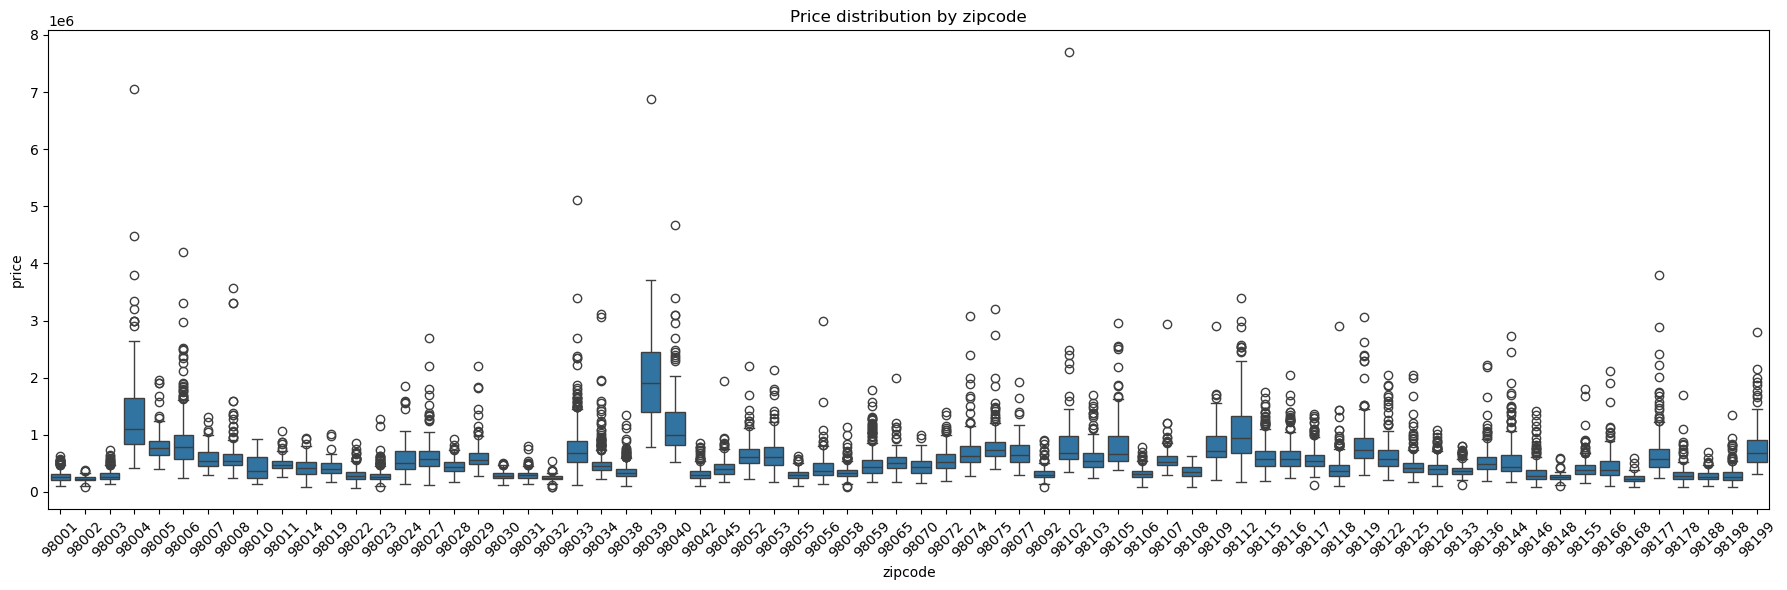

In [ ]:
cat_candidates = []
for c in df_train.columns:
    if pd.api.types.is_integer_dtype(df_train[c]) or (pd.api.types.is_numeric_dtype(df_train[c]) and df_train[c].nunique()<=30):
        if df_train[c].nunique() <= 30 and df_train[c].nunique() < 0.05*len(df_train):
            cat_candidates.append(c)
cat_candidates = sorted(list(set(cat_candidates) - {'id','price'}))
print("Candidate categorical columns (numeric-coded):", cat_candidates)

for c in cat_candidates:
    df_train[c] = df_train[c].astype('category')

for c in ['grade','condition','view','waterfront','zipcode']:
    if c in df_train.columns:
        plt.figure(figsize=(18,6))
        sns.boxplot(x=c, y='price', data=df_train)
        plt.title(f"Price distribution by {c}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

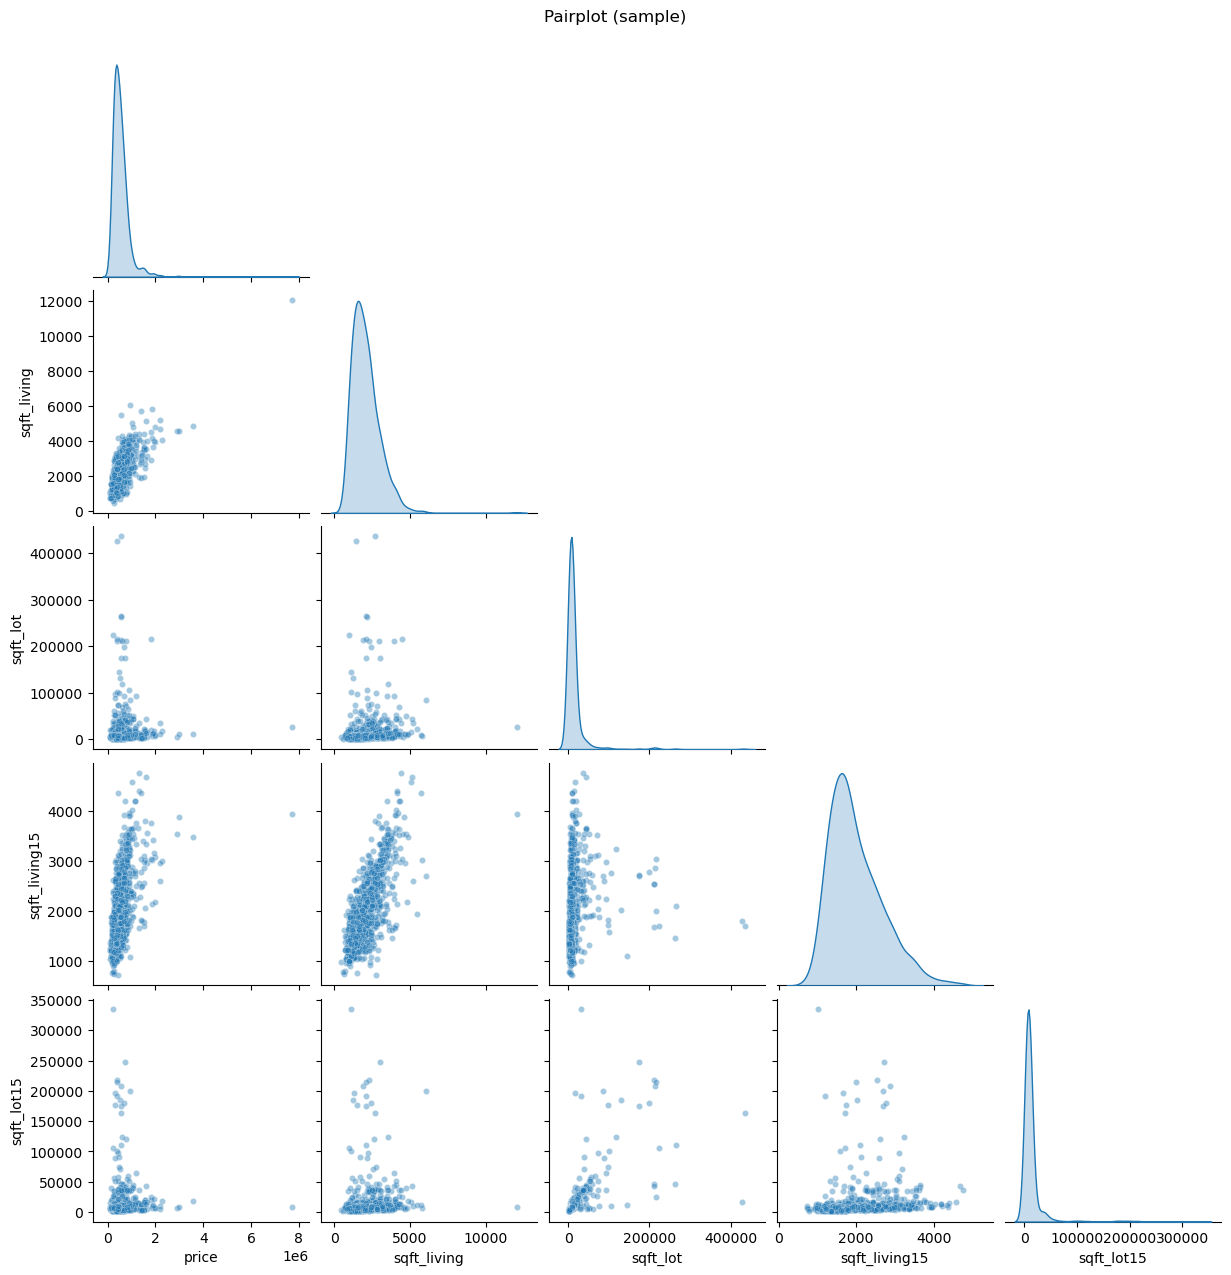

In [ ]:
pairs = ['price']
candidates = ['sqft_living','sqft_lot','bedrooms','bathrooms','sqft_living15','sqft_lot15','grade']
pairs += [c for c in candidates if c in df_train.columns]
sample_df = df_train[pairs].sample(n=min(1000, len(df_train)), random_state=42)
sns.pairplot(sample_df, diag_kind='kde', corner=True, plot_kws={'alpha':0.4, 's':20})
plt.suptitle("Pairplot (sample)", y=1.02)
plt.show()

In [ ]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ('id','price')]
cat_cols = df_train.select_dtypes(include=['category','object']).columns.tolist()

print("Numeric cols to impute:", numeric_cols)
print("Categorical cols to impute:", cat_cols)

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_train_num = pd.DataFrame(num_imputer.fit_transform(df_train[numeric_cols]), columns=numeric_cols, index=df_train.index)
df_train_cat = pd.DataFrame(cat_imputer.fit_transform(df_train[cat_cols]), columns=cat_cols, index=df_train.index)

df_train_clean = pd.concat([df_train[['id','price']].reset_index(drop=True), df_train_num.reset_index(drop=True), df_train_cat.reset_index(drop=True)], axis=1)

joblib.dump(num_imputer, "artifacts/num_imputer.pkl")
joblib.dump(cat_imputer, "artifacts/cat_imputer.pkl")

print("Imputation complete. Cleaned shape:", df_train_clean.shape)
display(df_train_clean.head())

Numeric cols to impute: ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical cols to impute: ['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
Imputation complete. Cleaned shape: (16209, 21)


id   price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0  1000102  280000       2400.0    9373.0      2400.0            0.0   
1  1200019  647500       2060.0   26036.0      1160.0          900.0   
2  1200021  400000       1460.0   43000.0      1460.0            0.0   
3  2800031  235000       1430.0    7599.0      1010.0          420.0   
4  3600057  402500       1650.0    3504.0       760.0          890.0   

   yr_built  yr_renovated  zipcode      lat  ...  sqft_living15  sqft_lot15  \
0    1991.0           0.0  98002.0  47.3262  ...         2060.0      7316.0   
1    1947.0           0.0  98166.0  47.4444  ...         2590.0     21891.0   
2    1952.0           0.0  98166.0  47.4434  ...         2250.0     20023.0   
3    1930.0           0.0  98168.0  47.4783  ...         1290.0     10320.0   
4    1951.0        2013.0  98144.0  47.5803  ...         1480.0      3504.0   

              date bedrooms bathrooms floors waterfront view condition grade  
0  20140916T000000        6       3.0    2.0          0    0         3     7  
1  20140508T000000        4      1.75    1.0          0    0         4     8  
2  20140811T000000        3       1.0    1.0          0    0         3     7  
3  20150401T000000        3       1.0    1.5          0    0         4     6  
4  20150319T000000        4       2.0    1.0          0    0         3     7  

[5 rows x 21 columns]

In [ ]:
skews = df_train_clean[numeric_cols].skew().sort_values(ascending=False)
display(skews.head(20).to_frame("skewness"))

to_transform = skews[skews.abs() > 1].index.tolist()
print("Columns with |skew|>1:", to_transform)

for c in to_transform:
    if (df_train_clean[c] > 0).all():
        df_train_clean[c + "_log1p"] = np.log1p(df_train_clean[c])
        print("Applied log1p to", c)
    else:
        print("Skipping log transform for", c, "(non-positive values present)")
        
display(df_train_clean[[c for c in df_train_clean.columns if c.endswith("_log1p")]].head())

skewness
sqft_lot       11.407202
sqft_lot15      8.751604
yr_renovated    4.601306
sqft_basement   1.571497
sqft_above      1.430353
sqft_living     1.378761
sqft_living15   1.094927
long            0.837556
zipcode         0.402986
yr_built       -0.472681
lat            -0.488362

Columns with |skew|>1: ['sqft_lot', 'sqft_lot15', 'yr_renovated', 'sqft_basement', 'sqft_above', 'sqft_living', 'sqft_living15']
Applied log1p to sqft_lot
Applied log1p to sqft_lot15
Skipping log transform for yr_renovated (non-positive values present)
Skipping log transform for sqft_basement (non-positive values present)
Applied log1p to sqft_above
Applied log1p to sqft_living
Applied log1p to sqft_living15


sqft_lot_log1p  sqft_lot15_log1p  sqft_above_log1p  sqft_living_log1p  \
0        9.145695          8.897956          7.783641           7.783641   
1       10.167274          9.993877          7.057037           7.630947   
2       10.668979          9.904687          7.286876           7.286876   
3        8.935904          9.241936          6.918695           7.266129   
4        8.161946          8.161946          6.634633           7.409136   

   sqft_living15_log1p  
0             7.630947  
1             7.859799  
2             7.719130  
3             7.163172  
4             7.300473

In [ ]:
scale_cols = [c for c in df_train_clean.columns if (c in numeric_cols) or c.endswith("_log1p")]
print("Scaling columns:", len(scale_cols))

scaler = StandardScaler()
scaler.fit(df_train_clean[scale_cols].values)
scaled = scaler.transform(df_train_clean[scale_cols].values)
df_scaled = df_train_clean.copy()
df_scaled[[f"{c}_scaled" for c in scale_cols]] = scaled

os.makedirs("artifacts", exist_ok=True)
joblib.dump(scaler, "artifacts/scaler.pkl")
print("StandardScaler saved to artifacts/scaler.pkl")
display(df_scaled.head())

Scaling columns: 16
StandardScaler saved to artifacts/scaler.pkl


id   price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0  1000102  280000       2400.0    9373.0      2400.0            0.0   
1  1200019  647500       2060.0   26036.0      1160.0          900.0   
2  1200021  400000       1460.0   43000.0      1460.0            0.0   
3  2800031  235000       1430.0    7599.0      1010.0          420.0   
4  3600057  402500       1650.0    3504.0       760.0          890.0   

   yr_built  yr_renovated  zipcode      lat  ...  zipcode_scaled  lat_scaled  \
0    1991.0           0.0  98002.0  47.3262  ...       -1.423985   -1.695203   
1    1947.0           0.0  98166.0  47.4444  ...        1.649845   -0.840758   
2    1952.0           0.0  98166.0  47.4434  ...        1.649845   -0.847987   
3    1930.0           0.0  98168.0  47.4783  ...        1.687331   -0.595701   
4    1951.0        2013.0  98144.0  47.5803  ...        1.237502    0.141638   

   long_scaled sqft_living15_scaled sqft_lot15_scaled sqft_lot_log1p_scaled  \
0     0.000024             0.112699         -0.201229              0.180159   
1    -0.977925             0.889957          0.339942              1.312372   
2    -0.949372             0.391339          0.270583              1.868410   
3    -0.364030            -1.016525         -0.089690             -0.052352   
4    -0.571041            -0.737885         -0.342769             -0.910127   

  sqft_lot15_log1p_scaled sqft_above_log1p_scaled sqft_living_log1p_scaled  \
0               -0.072786                0.914785                 0.555723   
1                1.273853               -0.792737                 0.194688   
2                1.164259               -0.252614                -0.618842   
3                0.349888               -1.117841                -0.667898   
4               -0.977177               -1.785388                -0.329767   

  sqft_living15_log1p_scaled  
0                   0.282748  
1                   0.982639  
2                   0.552435  
3                  -1.147826  
4                  -0.727926  

[5 rows x 42 columns]

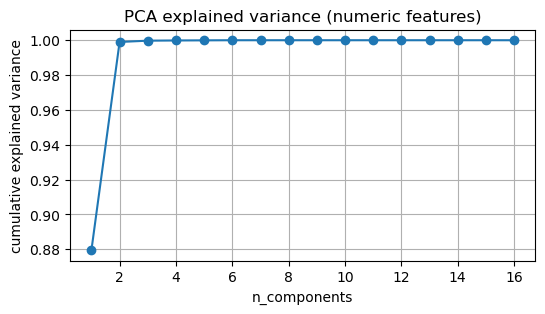

PCA saved to artifacts/pca_numeric.pkl


In [ ]:
pca_cols = scale_cols
X_for_pca = df_train_clean[scale_cols].fillna(0).values

pca = PCA(n_components=min(30, X_for_pca.shape[1]))
pca.fit(X_for_pca)
explained = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(6,3))
plt.plot(np.arange(1,len(explained)+1), explained, marker='o')
plt.xlabel("n_components")
plt.ylabel("cumulative explained variance")
plt.title("PCA explained variance (numeric features)")
plt.grid(True)
plt.show()

joblib.dump(pca, "artifacts/pca_numeric.pkl")
print("PCA saved to artifacts/pca_numeric.pkl")

Top features by |corr| with price: ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'lat']


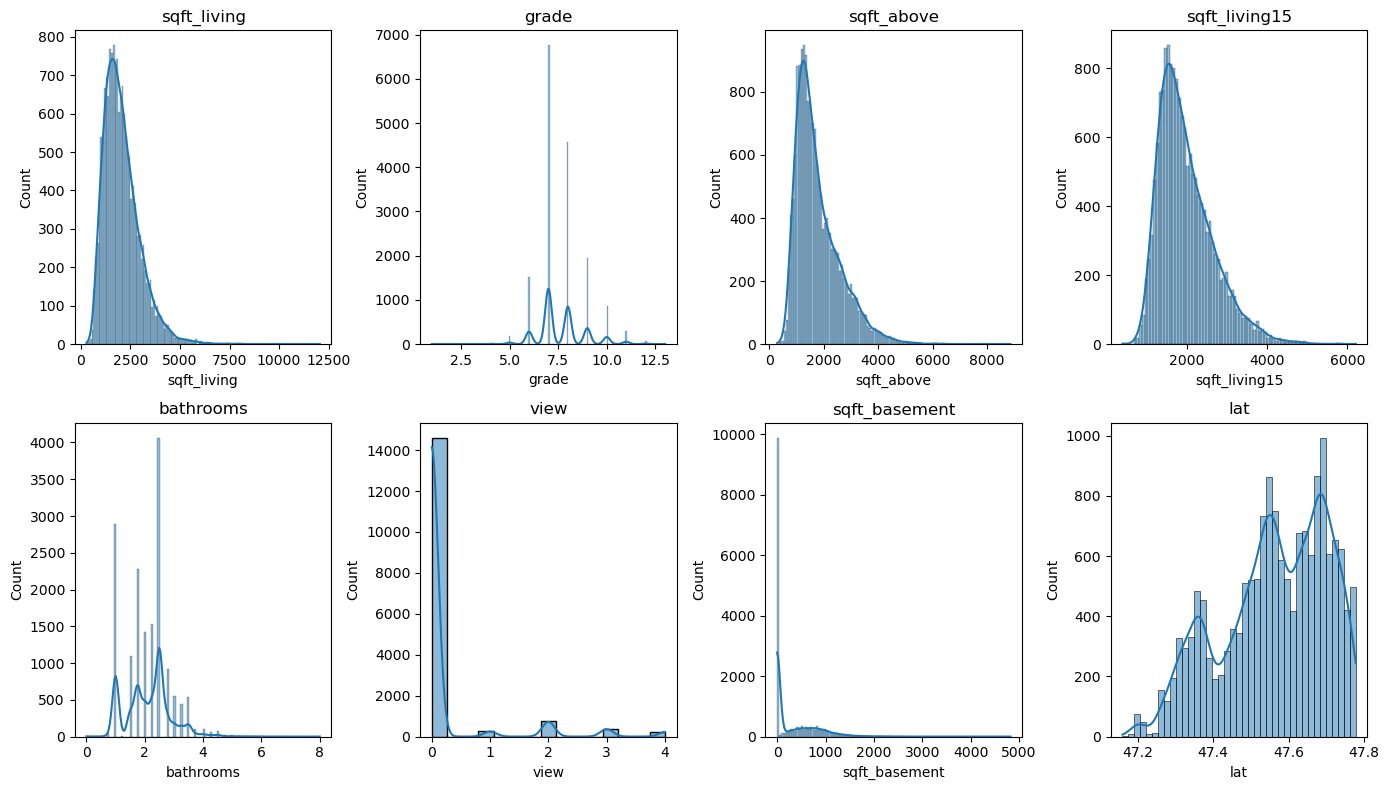

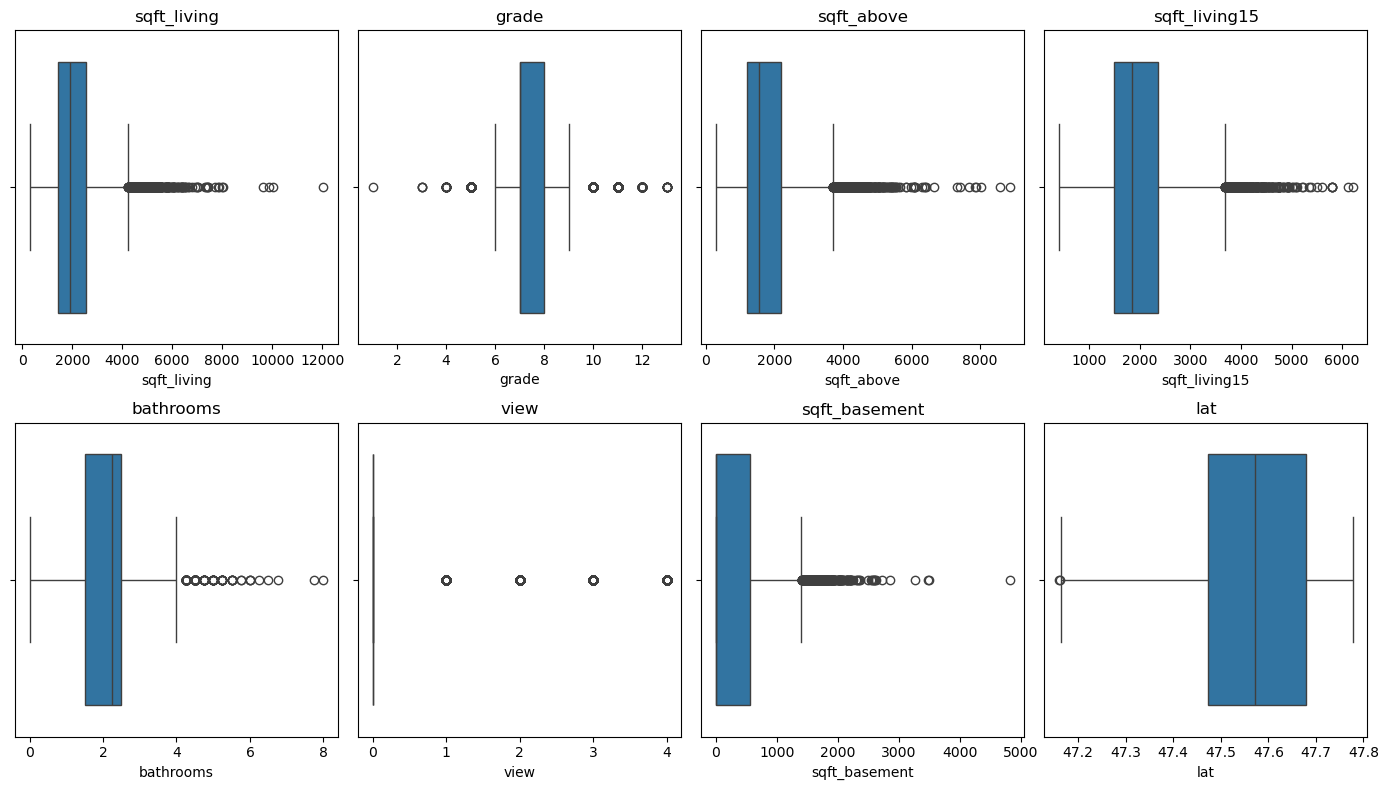

In [ ]:
top_feats = corr['price'].abs().sort_values(ascending=False).index.drop('price')[0:8].tolist()
print("Top features by |corr| with price:", top_feats)

plt.figure(figsize=(14,8))
for i,c in enumerate(top_feats,1):
    plt.subplot(2,4,i)
    if c in df_train_clean.columns:
        sns.histplot(df_train_clean[c].dropna(), kde=True)
        plt.title(c)
    else:
        plt.title(f"{c} not in cleaned df")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
for i,c in enumerate(top_feats,1):
    plt.subplot(2,4,i)
    sns.boxplot(x=df_train_clean[c].fillna(0))
    plt.title(c)
plt.tight_layout()
plt.show()

<font size="7">DATA VISUALIZATION (SAMPLE SATALLITE IMAGES)</font>

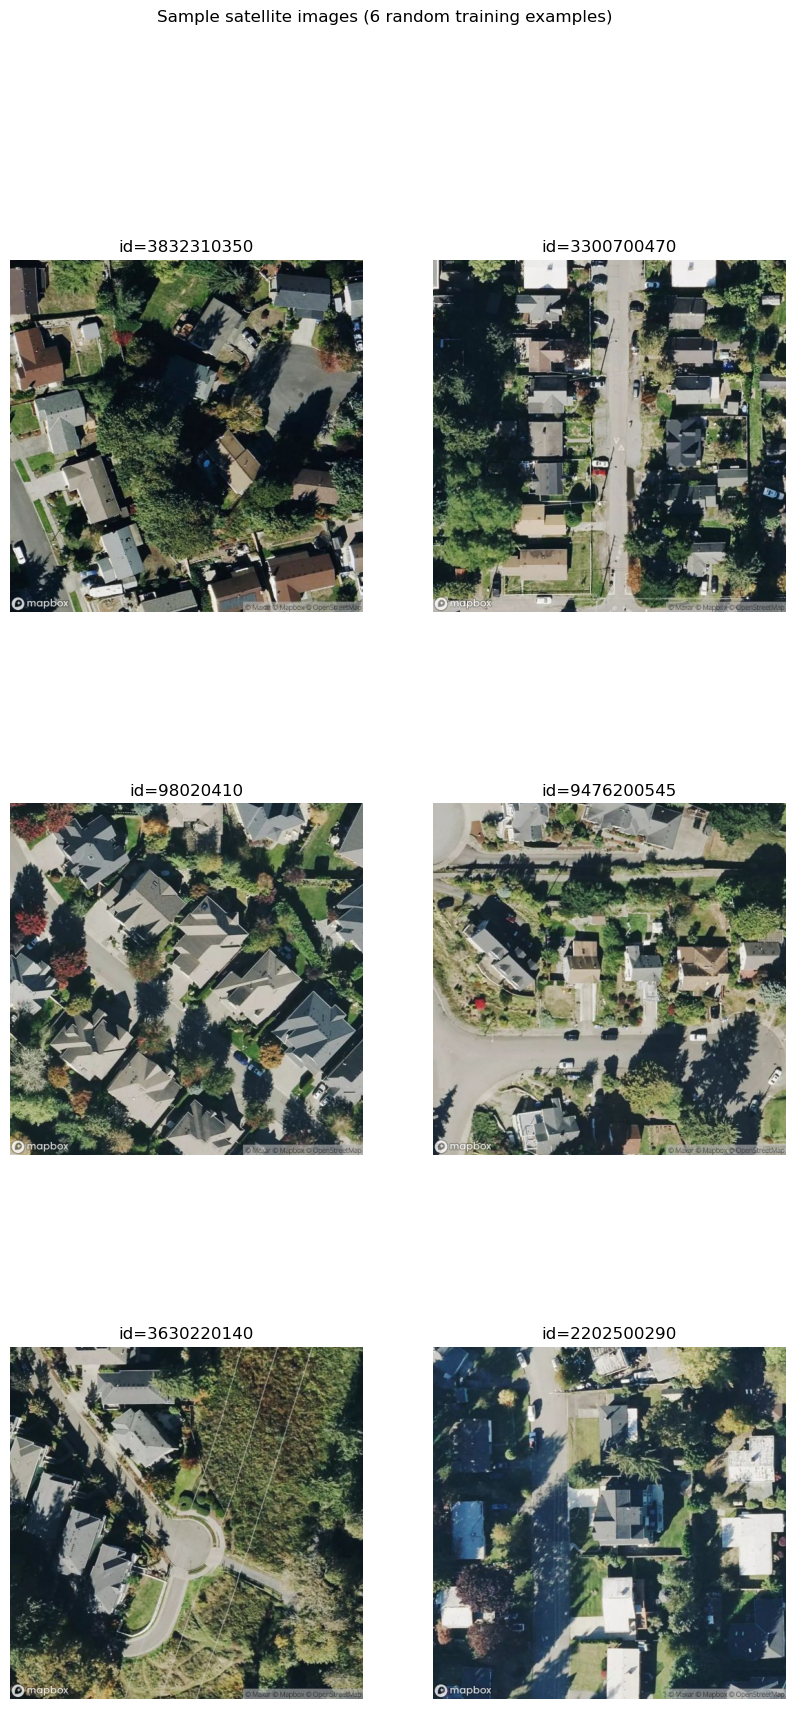

In [ ]:
IMG_DIR = Path("images_mapbox")
sample_ids = df_train['id'].dropna().sample(6)

plt.figure(figsize=(10,20))
for i, idv in enumerate(sample_ids):
    p = IMG_DIR / f"{int(idv)}.png"
    plt.subplot(3,2,i+1)
    img = Image.open(p)
    plt.imshow(img)
    plt.title(f"id={idv}")
    plt.axis('off')

plt.suptitle("Sample satellite images (6 random training examples)")
plt.show()

<font size="7">FEATURE ENGINEERING ON THE TABULAR DATA</font>

In [ ]:
from sklearn.cluster import KMeans

def engineer_features(df, is_train=True):
    df['date'] = pd.to_datetime(df['date'])
    df['sale_month'] = df['date'].dt.month
    df = pd.get_dummies(df, columns=['sale_month'], prefix='month', drop_first=True)
    df['year'] = df['date'].dt.year
    df['house_age'] = 2015 - df['yr_built']
    df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

    df['land_usage_ratio'] = df['sqft_living'] / df['sqft_lot']
    df['privacy_score'] = df['sqft_lot'] / df['sqft_living15']

    def haversine(lat1, lon1, lat2, lon2):
        R = 6371
        phi1, phi2 = np.radians(lat1), np.radians(lat2)
        dphi = np.radians(lat2 - lat1)
        dlambda = np.radians(lon2 - lon1)
        a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2) * np.sin(dlambda/2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        return R * c

    df['dist_downtown'] = haversine(df['lat'], df['long'], 47.6062, -122.3321)

    if is_train:
        zip_rank = df.groupby('zipcode')['price'].median().to_dict()
        joblib.dump(zip_rank, 'artifacts/zip_rank.pkl')
        df['zip_wealth_rank'] = df['zipcode'].map(zip_rank)
    else:
        zip_rank = joblib.load('artifacts/zip_rank.pkl')
        median_rank = np.median(list(zip_rank.values()))
        df['zip_wealth_rank'] = df['zipcode'].map(zip_rank).fillna(median_rank)



    coords = df[['lat', 'long']]
    if is_train:
        kmeans = KMeans(n_clusters=80, random_state=42, n_init=10)
        kmeans.fit(coords)
        joblib.dump(kmeans, 'artifacts/kmeans_geo.pkl')
        df['geo_cluster'] = kmeans.labels_
    else:
        kmeans = joblib.load('artifacts/kmeans_geo.pkl')
        df['geo_cluster'] = kmeans.predict(coords)

    cols_to_drop = ['date', 'zipcode', 'yr_built', 'yr_renovated']
    df_clean = df.drop(columns=cols_to_drop)

    return df_clean

print("Engineering Features...")
df_train_eng = engineer_features(df_train, is_train=True)

Engineering Features...


In [18]:
display(df_train_eng.head())

id   price bedrooms bathrooms  sqft_living  sqft_lot floors  \
0  1000102  280000        6      3.00         2400      9373    2.0   
1  1200019  647500        4      1.75         2060     26036    1.0   
2  1200021  400000        3      1.00         1460     43000    1.0   
3  2800031  235000        3      1.00         1430      7599    1.5   
4  3600057  402500        4      2.00         1650      3504    1.0   

  waterfront view condition  ... month_11  month_12  year  house_age  \
0          0    0         3  ...    False     False  2014         24   
1          0    0         4  ...    False     False  2014         68   
2          0    0         3  ...    False     False  2014         63   
3          0    0         4  ...    False     False  2015         85   
4          0    0         3  ...    False     False  2015         64   

   is_renovated  land_usage_ratio  privacy_score  dist_downtown  \
0             0          0.256055       4.550000      32.375513   
1             0          0.079121      10.052510      18.047221   
2             0          0.033953      19.111111      18.137073   
3             0          0.188183       5.890698      15.087352   
4             1          0.470890       2.367568       4.056716   

   zip_wealth_rank  geo_cluster  
0         235000.0           72  
1         390000.0           36  
2         390000.0           36  
3         235000.0           12  
4         445000.0           71  

[5 rows x 36 columns]

In [ ]:
os.makedirs("data/processed", exist_ok=True)
df_train_eng.to_csv("data/processed/df_train_eng.csv", index=False)
print("Saved processed train to data/processed/df_train_eng.csv")

Saved processed train to data/processed/df_train_eng.csv


<font size="7">GARDCAM VISUALISATION</font>

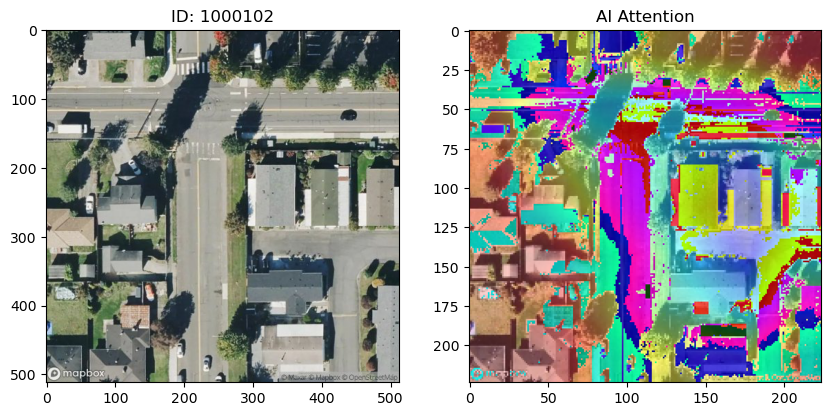

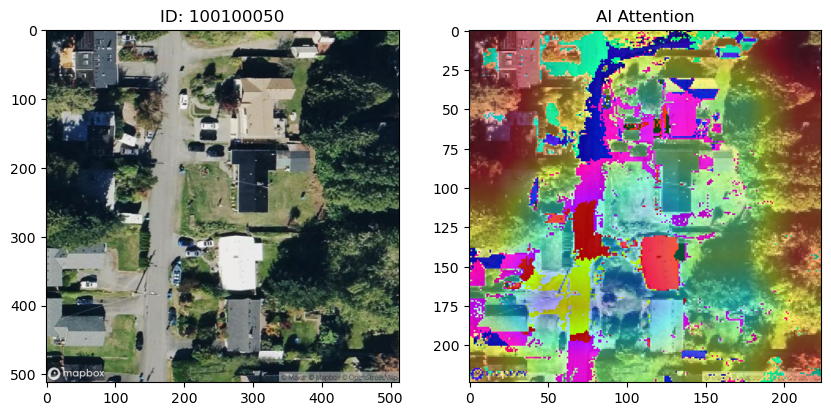

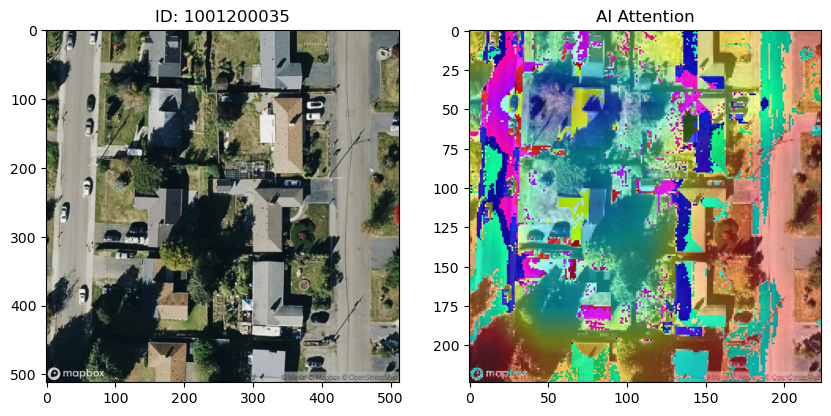

In [22]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
IMAGE_DIR = Path("images_mapbox")


def run_gradcam(img_id):
    img_path = IMAGE_DIR / f"{img_id}.png"
    if not img_path.exists(): return
    
    model = models.resnet18(pretrained=True)
    model.eval()
    

    gradients, activations = [], []
    def backward_hook(module, grad_input, grad_output): gradients.append(grad_output[0])
    def forward_hook(module, input, output): activations.append(output)
    
    target_layer = model.layer4[1].conv2
    h1 = target_layer.register_forward_hook(forward_hook)
    h2 = target_layer.register_full_backward_hook(backward_hook)
    

    try:
        preprocess = transforms.Compose([
            transforms.Resize((224, 224)), transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        img = Image.open(img_path).convert('RGB')
        input_tensor = preprocess(img).unsqueeze(0)
        
        output = model(input_tensor)
        score = output[:, output.argmax()].sum()
        model.zero_grad()
        score.backward()
        

        grads = gradients[0].cpu().data.numpy()[0]
        acts = activations[0].cpu().data.numpy()[0]
        weights = np.mean(grads, axis=(1, 2))
        cam = np.sum(weights[:, None, None] * acts, axis=0)
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (224, 224))
        cam = (cam - np.min(cam)) / np.max(cam)


        img_cv = cv2.resize(np.array(img), (224, 224))
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
        superimposed = heatmap * 0.4 + img_cv
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1); plt.imshow(img); plt.title(f"ID: {img_id}")
        plt.subplot(1, 2, 2); plt.imshow(superimposed.astype('uint8')); plt.title("AI Attention")
        plt.show()
        
    finally:
        h1.remove(); h2.remove()

for f in list(IMAGE_DIR.glob("*.png"))[:3]:
    run_gradcam(f.stem)